### 분류(Classification)란?
- 함께 머신러닝에서 가장 기초적인 데이터 분석 중 하나이다 
- 데이터가 어느 범주에 해당되는지 판단하는 문제로서 유사한 것들을 같은 범주로 묶으면 주변에서 일어나는 일을 빠르게 판단하는데
  도움이 된다.

분류 문제에는 명확한 답이 있는 지도학습(Supervised Learning)과  정답이 없는 비지도학습(Unsupervised Learning)이 있다. 
5장에서는 정답이 있는 Supervied Learning 에 해당하는 분류 문제만 다루도록 한다.

# 5.1 Binary Classification
Binary Classification 은 정답의 범주가 두 개인 분류 문제이다.

예시를 보자.
포도즙을 발효시켜 만든 술인 와인은 크게 레드와인과 화이트와인의 두 종류로 나눌 수 있다. 그런데 와인의 색깔을 모르는 상태에서 데이터만 보고 와인을 분류할 수 있을까? 

먼저 캘리포니아 어바인 대학에서 제공하는 와인 데이터세트를 불러오겠다. 이 데이터는 4.4절 에서 사용한 보스턴 주택가격 데이터세트와 다르게 케라스와 텐서플로에 미리 탑재돼 있지 않기 때문에 외부에서 데이터를 불러오고 정제하는 과정을 먼저 거쳐야 한다.

In [1]:
# 와인 데이터세트 불러오기
import pandas as pd
red = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
white = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')
print(red.head())
print(white.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [2]:
# 와인 데이터세트 합치기
red['type'] = 0
white['type'] = 1
print(red.head(2))
print(white.head(2))

wine = pd.concat([red, white])
print(wine.describe())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70          0.0             1.9      0.076   
1            7.8              0.88          0.0             2.6      0.098   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   

   alcohol  quality  type  
0      9.4        5     0  
1      9.8        5     0  
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   

   free sulfur dioxide  total sulfur dioxide  density   pH  sulphates  \
0                 45.0                 170.0    1.001  3.0       0.45   
1                 14.0                 132.0    0.994  3.3       0.49   

   

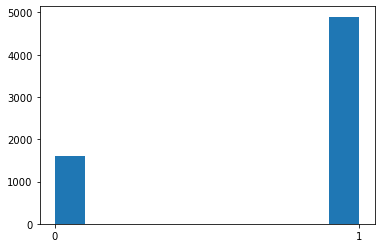

1    4898
0    1599
Name: type, dtype: int64


In [8]:
# 레드와인과 화이트와인 type 히스토그램
import matplotlib.pyplot as plt
plt.hist(wine['type'])
plt.xticks([0, 1])
plt.show()
print(wine['type'].value_counts())

In [4]:
# 데이터 요약 정보 확인
print(wine.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB
None


In [9]:
# 데이터 정규화
wine_norm = (wine - wine.min()) / (wine.max() - wine.min())
print(wine_norm.head())
print(wine_norm.describe())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.297521          0.413333     0.000000        0.019939   0.111296   
1       0.330579          0.533333     0.000000        0.030675   0.147841   
2       0.330579          0.453333     0.024096        0.026074   0.137874   
3       0.611570          0.133333     0.337349        0.019939   0.109635   
4       0.297521          0.413333     0.000000        0.019939   0.111296   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.034722              0.064516  0.206092  0.612403   0.191011   
1             0.083333              0.140553  0.186813  0.372093   0.258427   
2             0.048611              0.110599  0.190669  0.418605   0.241573   
3             0.055556              0.124424  0.209948  0.341085   0.202247   
4             0.034722              0.064516  0.206092  0.612403   0.191011   

    alcohol   quality  type  
0  0.202899  0.333333   0.

In [10]:
# 데이터를 섞은 후 numpy array로 변환
import numpy as np
wine_shuffle = wine_norm.sample(frac=1)
print(wine_shuffle.head())
wine_np = wine_shuffle.to_numpy()
print(wine_np[:5])

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
3084       0.231405          0.060000     0.210843        0.030675   0.034884   
4659       0.231405          0.113333     0.150602        0.010736   0.051495   
1172       0.487603          0.226667     0.277108        0.023006   0.107973   
405        0.247934          0.126667     0.072289        0.010736   0.051495   
3386       0.190083          0.133333     0.162651        0.062883   0.034884   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
3084             0.111111              0.165899  0.083864  0.387597   
4659             0.093750              0.182028  0.052632  0.116279   
1172             0.013889              0.023041  0.180837  0.426357   
405              0.298611              0.373272  0.094274  0.356589   
3386             0.190972              0.308756  0.063813  0.341085   

      sulphates   alcohol   quality  type  
3084   0.280899  0.478261  0.500000   1.0 

In [16]:
# train 데이터와 test 데이터로 분리
import tensorflow as tf
print(tf.__version__)
train_idx = int(len(wine_np) * 0.8)
train_X, train_Y = wine_np[:train_idx, :-1], wine_np[:train_idx, -1]
test_X, test_Y = wine_np[train_idx:, :-1], wine_np[train_idx:, -1]
print(train_X[0])
print(train_Y[0])
print(test_X[0])
print(test_Y[0])
train_Y = tf.keras.utils.to_categorical(train_Y, num_classes=2)
test_Y = tf.keras.utils.to_categorical(test_Y, num_classes=2)
print(train_Y[0])
print(test_Y[0])

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Anaconda\envs\tensorflow2.0\lib\site-packages\IPython\core\interactiveshell.py", line 3319, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-16-2923a82d4357>", line 3, in <module>
    print(tf.__version__)
AttributeError: module 'tensorflow' has no attribute '__version__'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Anaconda\envs\tensorflow2.0\lib\site-packages\IPython\core\interactiveshell.py", line 2034, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'AttributeError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Anaconda\envs\tensorflow2.0\lib\site-packages\tensorflow_core\python\pywrap_tensorflow.py", line 58, in <module>
    from tensorflow.python.pywrap_tensorflow_internal import *
  File "C

AttributeError: module 'tensorflow' has no attribute '__version__'

In [12]:
type(wine_np)

numpy.ndarray

In [ ]:
# 와인 데이터셋 분류 모델 생성
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Dense(unit=48, activation='relu', input_shape=(12,)),
    tf.keras.layers.Dense(unit=24, activation='relu'),
    tf.keras.layers.Dense(unit=12, activation='relu'),
    tf.keras.layers.Dense(unit=2, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07), loss='catergorical_crossentropy', metrics='accuracy')

model.summary()

In [ ]:
# 출력코드
import matplotlib.pyplot as plt
import math
import numpy as np
x = np.arange(-2,2,-0.01)
e_x = math.e**x

plt.axhline(0, color='gray')
plt/axvline(0, color='gray')
plt.plot(x,x, 'b-', label='y=x')
plt.plot(x,e_x, 'g', label='y=e^x')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [ ]:
# 와인 데이터셋 분류 모델 학습
history = model.fit(train_X, train_Y, epochs=25, batch_size=32, validation_split=25)

In [ ]:
# 분류모델 학습 결과 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history, history['loss'], 'b-', label='val_loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

In [ ]:
# 분류 모델 평가
model.evaluate(test_X, test_Y)

# multi-regression

In [ ]:
# 품질 데이터 확인
print(wine['quality'], describe())
print(wine['quality'], value_counts())


In [ ]:
# 품질 히스토그램 시각화
